In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import Imputer
import numpy as np

In [289]:
inputdata = pd.read_csv('Mayfiredata.csv')
inputdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 16 columns):
Date            31 non-null int64
Month           31 non-null int64
Year            31 non-null int64
Temp_Max        31 non-null int64
Temp_Avg        31 non-null int64
Temp_Min        31 non-null int64
Dew_Max         31 non-null int64
Dew_Ang         31 non-null int64
Dew_Min         31 non-null int64
Hum_Max         31 non-null int64
Hum_Min         31 non-null int64
Wind_Max        31 non-null int64
Wind_Min        31 non-null int64
Pressure_Max    31 non-null float64
Pressure_Min    31 non-null float64
Class           31 non-null int64
dtypes: float64(2), int64(14)
memory usage: 4.0 KB


In [290]:
inputdata.head()

,Date,Month,Year,Temp_Max,Temp_Avg,Temp_Min,Dew_Max,Dew_Ang,Dew_Min,Hum_Max,Hum_Min,Wind_Max,Wind_Min,Pressure_Max,Pressure_Min,Class
0,1,5,2017,77,69,60,60,51,33,87,27,13,0,30.01,29.90,0
1,2,5,2017,72,67,61,60,59,56,97,63,12,0,29.98,29.90,0
2,3,5,2017,75,68,61,61,59,57,90,57,13,0,30.01,29.93,0
3,4,5,2017,73,69,64,60,59,57,84,64,14,0,30.00,29.93,0
4,5,5,2017,66,64,62,58,57,53,84,78,12,4,29.96,29.85,0


In [291]:
inputdata.describe()

,Date,Month,Year,Temp_Max,Temp_Avg,Temp_Min,Dew_Max,Dew_Ang,Dew_Min,Hum_Max,Hum_Min,Wind_Max,Wind_Min,Pressure_Max,Pressure_Min,Class
count,31.000000,31.0,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.000000,5.0,2017.0,69.741935,65.225806,60.161290,57.193548,54.129032,50.322581,84.483871,57.096774,15.612903,1.354839,29.997097,29.908387,0.129032
std,9.092121,0.0,0.0,5.253366,3.593602,2.450806,2.868442,3.649127,6.342382,7.316060,12.921184,3.422255,2.259032,0.065838,0.059391,0.340777
min,1.000000,5.0,2017.0,59.000000,56.000000,53.000000,50.000000,46.000000,33.000000,69.000000,22.000000,12.000000,0.000000,29.910000,29.820000,0.000000
25%,8.500000,5.0,2017.0,66.000000,63.000000,59.000000,56.000000,51.000000,47.000000,79.500000,52.500000,13.500000,0.000000,29.940000,29.870000,0.000000
50%,16.000000,5.0,2017.0,70.000000,65.000000,61.000000,57.000000,55.000000,53.000000,84.000000,60.000000,14.000000,0.000000,29.990000,29.900000,0.000000
75%,23.500000,5.0,2017.0,72.000000,67.500000,61.000000,60.000000,56.500000,55.000000,90.000000,63.500000,17.000000,4.000000,30.040000,29.930000,0.000000
max,31.000000,5.0,2017.0,85.000000,75.000000,64.000000,61.000000,60.000000,58.000000,97.000000,78.000000,26.000000,8.000000,30.150000,30.080000,1.000000


In [292]:
inputdata.isnull().sum()

Date            0
Month           0
Year            0
Temp_Max        0
Temp_Avg        0
Temp_Min        0
Dew_Max         0
Dew_Ang         0
Dew_Min         0
Hum_Max         0
Hum_Min         0
Wind_Max        0
Wind_Min        0
Pressure_Max    0
Pressure_Min    0
Class           0
dtype: int64

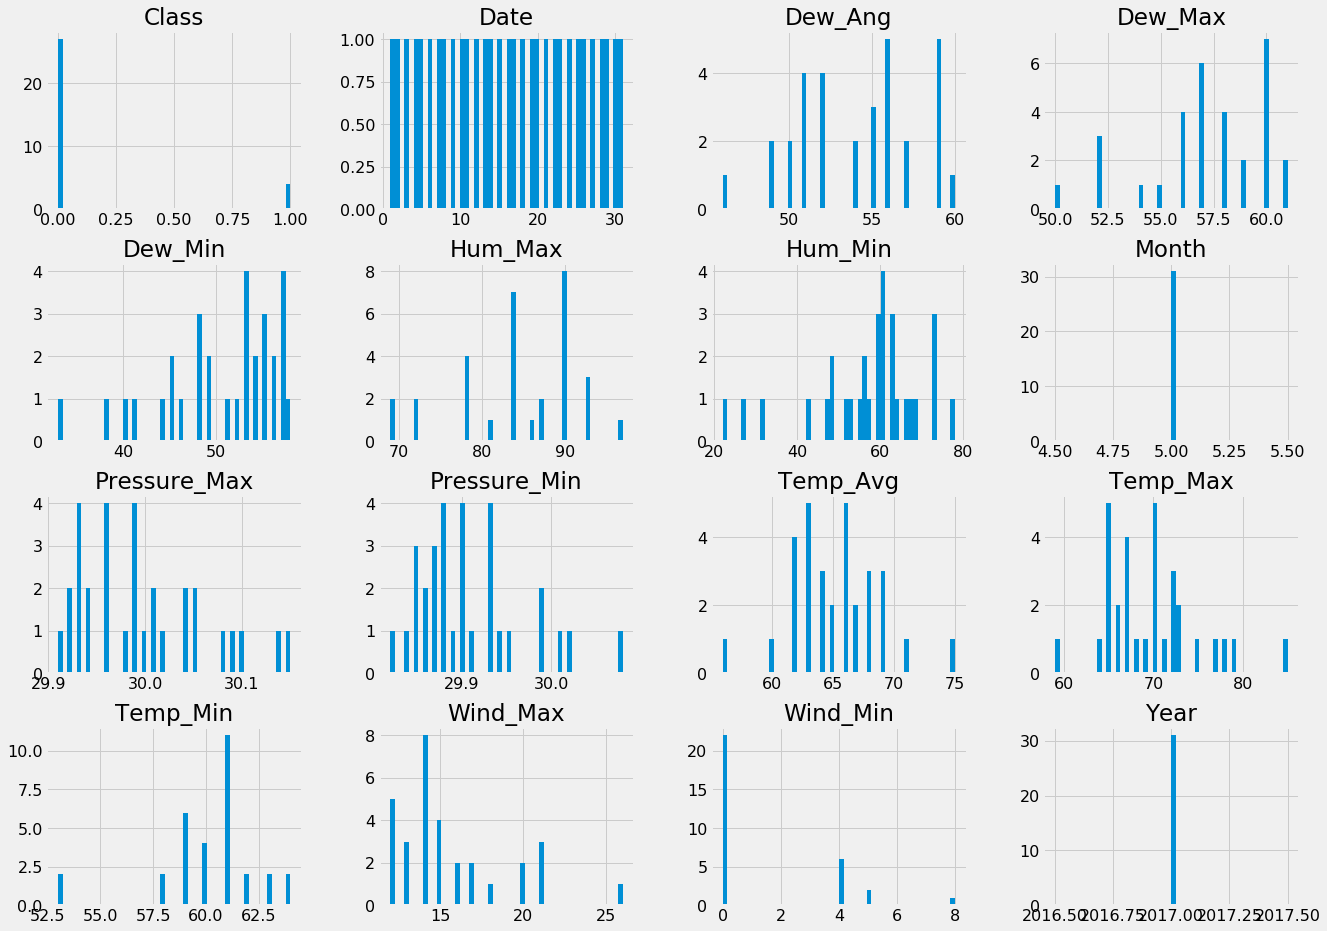

In [293]:
inputdata.hist(bins = 50, figsize = (20,15))
plt.show()

In [294]:
# Extract the labels
labels = np.array(inputdata.pop('Class'))

In [295]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(inputdata,
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.2, 
                                         random_state = 42)
print(len(train), "train +", len(test), "test")

24 train + 7 test


In [296]:
# Imputation of missing values
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [297]:
inputdata.shape

(31, 15)

In [298]:
test.shape
train.shape

(24, 15)

In [299]:
# Features for feature importances
features = list(train.columns)

In [300]:
# Create the model with 100 trees
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               bootstrap = True,
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [301]:
# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=1, warm_start=False)

In [302]:
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 6
Average maximum depth 2


In [303]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [304]:
# Testing predictions (to determine performance)
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [305]:
test

,Date,Month,Year,Temp_Max,Temp_Avg,Temp_Min,Dew_Max,Dew_Ang,Dew_Min,Hum_Max,Hum_Min,Wind_Max,Wind_Min,Pressure_Max,Pressure_Min
24,25,5,2017,68,65,61,52,51,49,72,56,14,0,29.96,29.87
19,20,5,2017,85,75,64,60,50,41,81,22,21,0,29.91,29.82
23,24,5,2017,71,66,61,59,56,52,90,61,14,0,29.93,29.85
10,11,5,2017,70,66,61,56,56,55,84,63,17,4,30.14,30.08
6,7,5,2017,59,56,53,52,49,45,93,66,26,0,29.92,29.88
14,15,5,2017,65,62,58,50,46,40,69,43,20,8,30.02,29.93
7,8,5,2017,67,60,53,57,52,45,93,48,21,0,29.93,29.85


In [306]:
rf_predictions

array([0, 0, 0, 0, 0, 0, 0])

In [307]:
test_labels

array([0, 1, 0, 0, 0, 0, 0])

In [308]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

In [309]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

Recall Baseline: 1.0 Test: 0.0 Train: 1.0
Precision Baseline: 0.14 Test: 0.0 Train: 1.0
Roc Baseline: 0.5 Test: 1.0 Train: 1.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


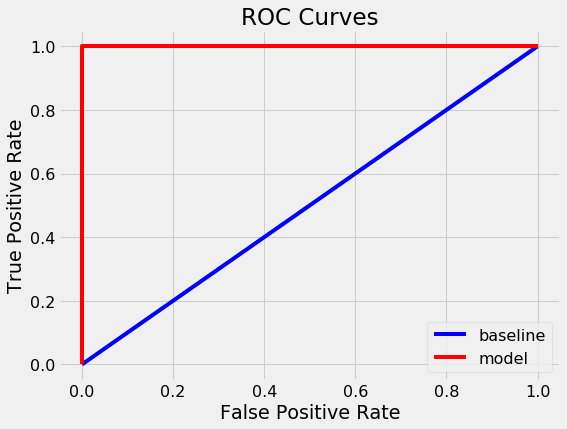

<Figure size 432x288 with 0 Axes>

In [310]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')

In [311]:
from sklearn.metrics import confusion_matrix
import itertools

In [312]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[6 0]
 [1 0]]


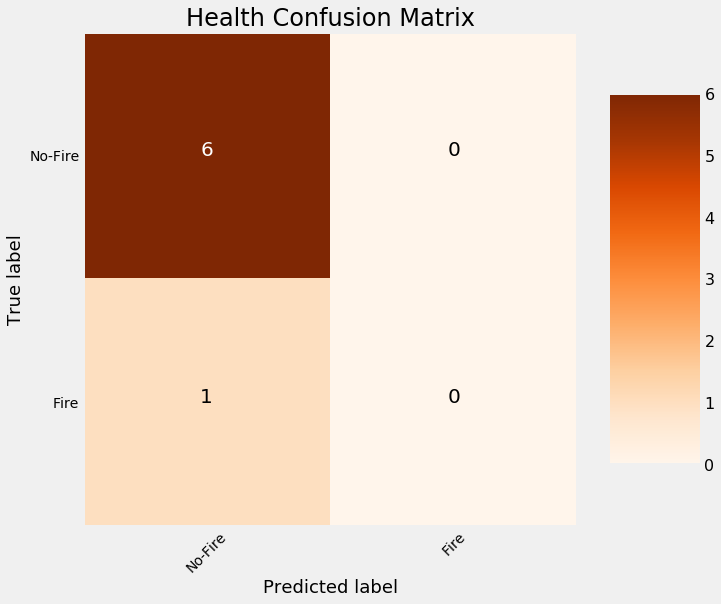

In [313]:
# Confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['No-Fire', 'Fire'],
                      title = 'Health Confusion Matrix')

plt.savefig('cm.png')

In [314]:
from sklearn.metrics import roc_auc_score

rf_probs = model.predict_proba(test)[:, 1]
# Calculate roc auc
roc_value = roc_auc_score(test_labels, rf_probs)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [315]:
#Feature Importance
# Extract feature importances
fi = pd.DataFrame({'feature': list(train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head()

,feature,importance
8,Dew_Min,0.181889
0,Date,0.104318
4,Temp_Avg,0.095486
7,Dew_Ang,0.086607
9,Hum_Max,0.086171


In [316]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())